## Overview

Singular Value Decomposition (SVD)

SVD is a matrix factorization technique in linear algebra. Widely used for dimensionality reduction, data compression, recommender system, image processing.

A matrix A can be decomposed as A = UΣV^T

time spend: ~2hrs

Credit:

[Youtube - SVD: Image Compression in Python](https://www.youtube.com/watch?v=H7qMMudo3e8&ab_channel=SteveBrunton)

[Code from this website](https://databookuw.com/)


From below, we can see that by incresing the rank, it dramatically increase the image quality.

Below line graphs are the plots of 1) the log sigular value and 2) cumulative sum of the singular value, as it shows the fraction of the energy captured by the rank r, maximum of 1 equal to 100% of the energy.

We can see first 100 ranks captures over 50% of the energy, or in this case, the image quality

In [2]:
import numpy as np
from scipy.linalg import svd

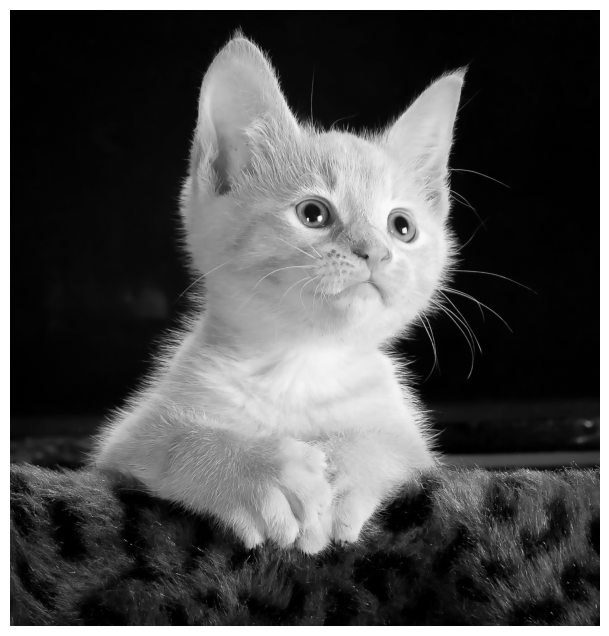

In [8]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [16, 8]

# A = imread('/content/drive/MyDrive/ml-projects/recommender-system/datasets/SVD/dog.jpg')
A = imread('/content/drive/MyDrive/ml-projects/recommender-system/datasets/SVD/kitty.jpg')
X = np.mean(A, -1); # Convert RGB to grayscale

img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

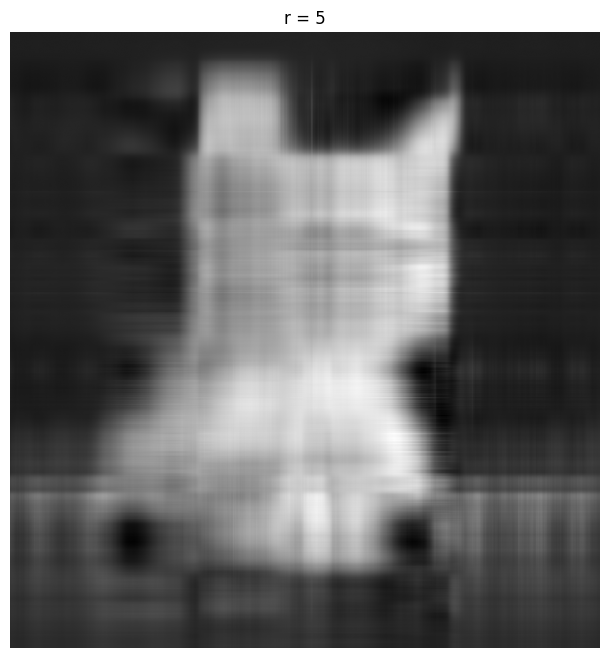

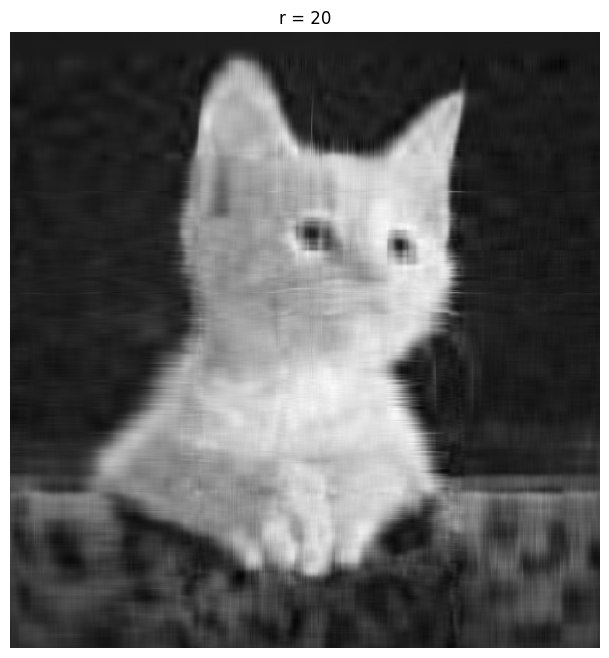

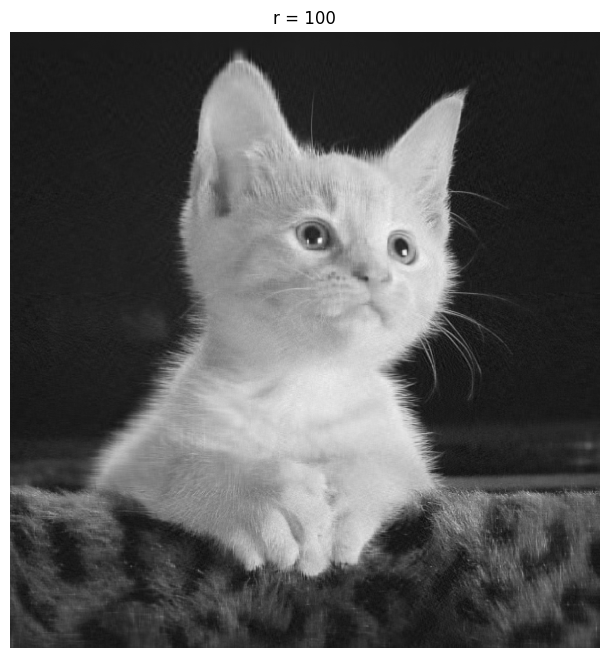

In [9]:
U, S, VT = np.linalg.svd(X,full_matrices=False)
S = np.diag(S)

j = 0
for r in (5, 20, 100):
    # Construct approximate image
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    plt.figure(j+1)
    j += 1
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r = ' + str(r))
    plt.show()

From above, we can see that by incresing the rank, it dramatically increase the image quality.

Below are the plots of 1) the log sigular value and 2) cumulative sum of the singular value, as it shows the fraction of the energy captured by the rank r, maximum of 1 equal to 100% of the energy.

We can see first 100 ranks captures over 50% of the energy, or in this case, the image quality

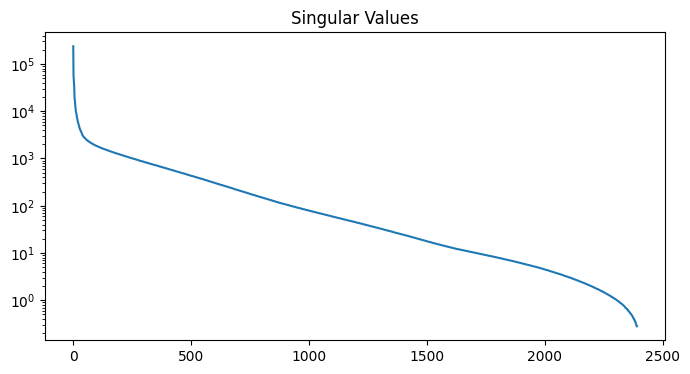

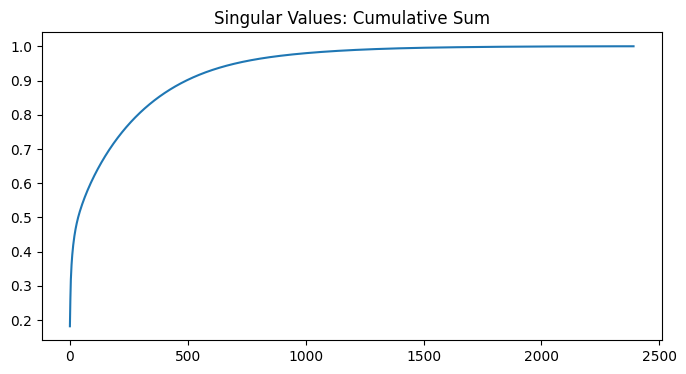

In [10]:
## f_ch01_ex02_2

plt.figure(1, figsize=(8, 4))
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

plt.figure(2, figsize=(8,4))
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.show()